In [ ]:
using Pkg
Pkg.activate("..")
using Pun
using Plots

include("../examples.jl")

  Activating project at `~/Documents/code/Pun.jl`


UndefVarError: UndefVarError: `Interpreter` not defined in `Pun`
Suggestion: check for spelling errors or missing imports.

In [5]:
struct LinearModel
    slope::Real
    intercept::Real
end

linear_model_prior() = @prob begin
    slope <<= normal(0, 1)
    intercept <<= normal(0, 2)
    return LinearModel(slope, intercept)
end

bayesian_linear_regression(xs::Vector{Float64}) = @prob begin
    linear_model <<= linear_model_prior()
    
    # Given the slope and intercept, we can sample y coordinates
    # for each of the x coordinates in our input vector.
    y <<= mapM(x -> normal(linear_model.slope * x + linear_model.intercept, 0.1), xs)
    linear_model >>= @prob begin
        slope <<= normal(inv(transpose(xs) * xs) * (transpose(xs) * y), 1)
        intercept <<= normal(0, 2)
        return LinearModel(slope, intercept)
    end
    return y
end

bayesian_linear_regression (generic function with 1 method)

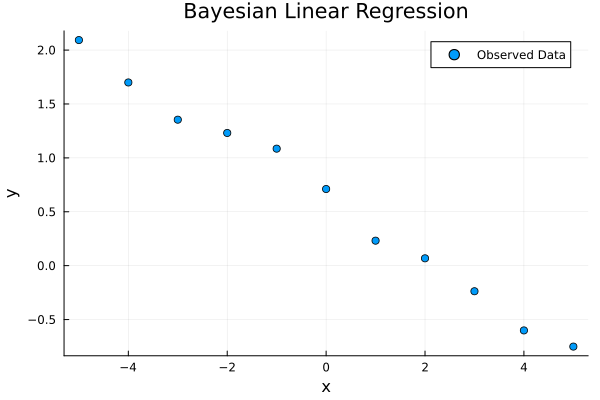

In [ ]:
xs = [-5., -4., -3., -2., -1., 0., 1., 2., 3., 4., 5.]
y = [dual.value for dual in simulate(bayesian_linear_regression(xs))[1]]

plot(xs, y, seriestype=:scatter, label="Observed Data", title="Bayesian Linear Regression", xlabel="x", ylabel="y")

In [55]:
# First we generate N samples using the prior as a proposal distribution.
N = 1000
samples = []
log_probs = []
for i in 1:N
    sample, log_prob = simulate(bayesian_linear_regression(xs))
    push!(samples, map(x->x.value, sample))
    push!(log_probs, log_prob)
end

# We then compute the weights for each sample.

In [ ]:
 using DynamicForwardDiff

In [116]:
s = Pun.EvalState()
p = bayesian_linear_regression(xs)
sample = Pun.interpret_program(p, s)
y_dual = map(x -> DynamicForwardDiff.new_dual(s.cfg, x), y)
println(s.logweight)
Pun.uninterpret_program(p, s, y_dual)
d = Pun.compute_jacobian_correction((y_dual, s.tape))
weight = exp(s.logweight)
s.logweight

-10.199574805608753


┌ Warning: Make sure you intended to assess density w.r.t. this base measure.
└ @ Pun /Users/tlong/Documents/code/Pun.jl/src/interpreter.jl:151
┌ Warning: ([0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0; 0.0

-1775.898992248589

In [84]:
s.logweight

-5899.6407557275215